In [6]:
!pip install opencv-python


In [7]:
from google.colab import files
uploaded = files.upload()

Saving images.jpg to images.jpg


In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [18]:
def show_image(img, title="Image"):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,5))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

[INFO] Showing Original Image


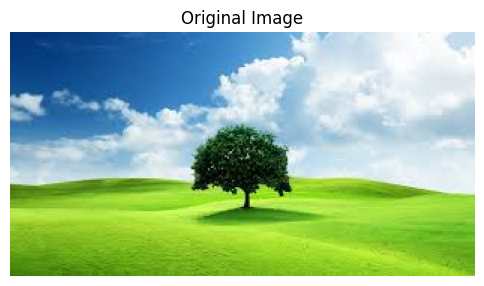

In [22]:
image_path = "images.jpg"
original = cv2.imread(image_path)
if original is None:
    raise FileNotFoundError("Image not found. Make sure you uploaded it.")

print("[INFO] Showing Original Image")
show_image(original, "Original Image")

[INFO] Converted to Grayscale


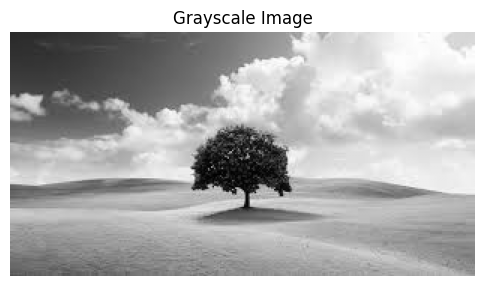

In [23]:
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
print("[INFO] Converted to Grayscale")
show_image(gray, "Grayscale Image")

[INFO] Applied Gaussian Blur


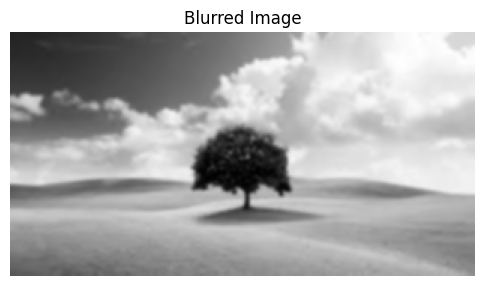

In [24]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
print("[INFO] Applied Gaussian Blur")
show_image(blurred, "Blurred Image")

[INFO] Detected Edges (Canny)


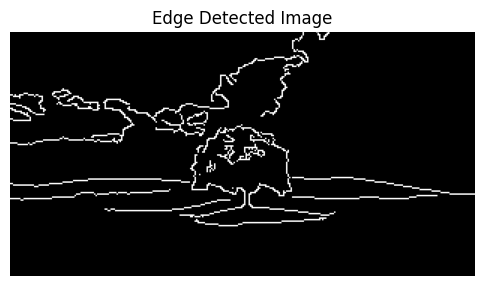

In [26]:
edges = cv2.Canny(blurred, 50, 150)
print("[INFO] Detected Edges (Canny)")
show_image(edges, "Edge Detected Image")

[INFO] Found and Drew 31 Contours


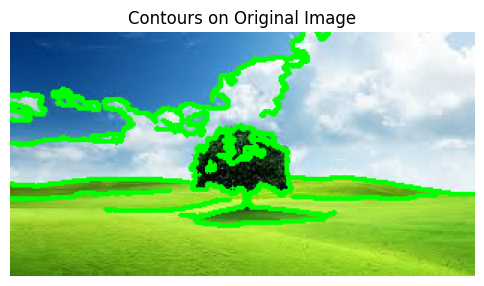

In [27]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contoured = original.copy()
cv2.drawContours(contoured, contours, -1, (0, 255, 0), 2)
print(f"[INFO] Found and Drew {len(contours)} Contours")
show_image(contoured, "Contours on Original Image")

[INFO] Resized Final Image


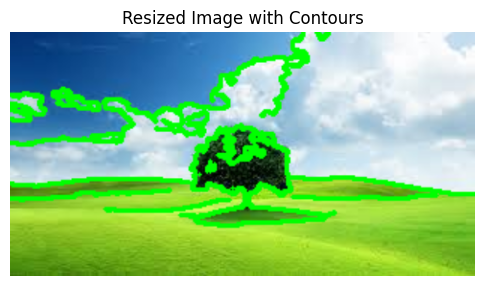

In [28]:
width = 600
scale = width / contoured.shape[1]
height = int(contoured.shape[0] * scale)
resized = cv2.resize(contoured, (width, height))
print("[INFO] Resized Final Image")
show_image(resized, "Resized Image with Contours")